In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage import transform
import os
import pandas as pd

## Image Processing

In [2]:
image=io.imread(r'.\data\Brown_spot\DSC_0100.jpg')
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [160, 182,  71],
        [165, 185,  74],
        [166, 185,  77]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [160, 184,  74],
        [164, 187,  79],
        [168, 191,  83]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [173, 199,  89],
        [177, 203,  96],
        [181, 207, 100]]

In [3]:
image.shape

(250, 766, 3)

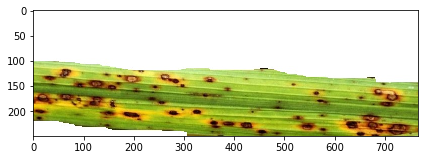

In [4]:
io.imshow(image)

In [5]:
image.shape

(250, 766, 3)

In [6]:
250*766*3

574500

In [7]:
One_dimention=image.flatten()

In [8]:
One_dimention

array([255, 255, 255, ..., 181, 207, 100], dtype=uint8)

In [9]:
One_dimention.shape

(574500,)

## Image Pixel size Reduce

In [10]:
resized=transform.resize(image, output_shape=(64,64))

In [11]:
resized.shape

(64, 64, 3)

In [12]:
One_dimention=resized.flatten()

In [13]:
One_dimention

array([1.        , 1.        , 1.        , ..., 0.65044206, 0.71472372,
       0.2818516 ])

In [14]:
One_dimention.shape

(12288,)

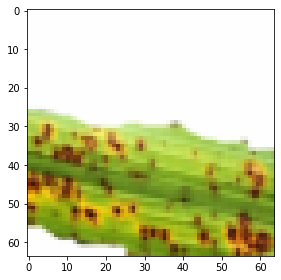

In [15]:
io.imshow(resized)

In [16]:
class preprocess:
    def __init__(self, Path: str)->None:
        self.path=Path
        
    def process_and_normalized(self):
        image=io.imread(self.path)
        resized_img=transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()

In [17]:
all_image=os.listdir('data')

In [18]:
all_image

['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

In [19]:
for disease in all_image:
    print(disease)

Bacterial_leaf_blight
Brown_spot
Leaf_smut


In [20]:
for disease in all_image:
    folder=f'.\\data\\{disease}'
    print(os.listdir(folder))

['DSC_0365.JPG', 'DSC_0366.jpg', 'DSC_0367.JPG', 'DSC_0370.jpg', 'DSC_0372.JPG', 'DSC_0373.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0380.JPG', 'DSC_0381.JPG', 'DSC_0382.JPG', 'DSC_0383.JPG', 'DSC_0384.JPG', 'DSC_0385.jpg', 'DSC_0386.JPG', 'DSC_0388.JPG', 'DSC_0389.JPG', 'DSC_0390.JPG', 'DSC_0392.JPG', 'DSC_0393.JPG', 'DSC_0395.JPG', 'DSC_0396.JPG', 'DSC_0397.JPG', 'DSC_0398.JPG', 'DSC_0399.JPG', 'DSC_0400.JPG', 'DSC_0401.JPG', 'DSC_0402.JPG', 'DSC_0403.JPG', 'DSC_0404.JPG', 'DSC_0405.JPG', 'DSC_0406.JPG', 'DSC_0700.jpg', 'DSC_0701.jpg', 'DSC_0702.jpg', 'DSC_0703.JPG']
['DSC_0100.jpg', 'DSC_0101.jpg', 'DSC_0104.jpg', 'DSC_0105.jpg', 'DSC_0106.jpg', 'DSC_0107.jpg', 'DSC_0108.jpg', 'DSC_0109.jpg', 'DSC_0110.jpg', 'DSC_0111.jpg', 'DSC_0112.jpg', 'DSC_0113.jpg', 'DSC_0114.jpg', 'DSC_0115.jpg', 'DSC_0116.jpg', 'DSC_0117.jpg', 'DSC_0118.jpg', 'DSC_0119.jpg', 'DSC_0121.jpg', 'DSC_0292.JPG', 'DSC_0295.JPG', 'DSC_0296.jpg', 'DSC_0

In [21]:
len(folder)

16

In [22]:
class preprocess:
    def __init__(self, Path: str)->None:
        self.path=Path
        
    def process_and_normalized(self):
        image=io.imread(self.path)
        resized_img=transform.resize(image, output_shape=(64,64))
        return resized_img.flatten()

In [23]:
folders=['Bacterial_leaf_blight','Brown_spot','Leaf_smut']
images=[]
labels=[]

In [24]:
for disease in all_image:
    folder=f'.\\data\\{disease}'
    for file in (os.listdir(folder)):
        from_path=folder+'\\'+file
        #to_path=f'.\\Preprocessed\\{disease}'+'\\'+file
        processor=preprocess(from_path)
        vector=processor.process_and_normalized()
        #io.imsave(to_path,vector)
        images.append(vector)
        labels.append(folders.index(disease))
        

In [25]:
images

[array([0.89485325, 0.83851504, 0.81789253, ..., 0.89312131, 0.84112241,
        0.82061944]),
 array([0.89472327, 0.83886637, 0.81889132, ..., 0.90482844, 0.84752569,
        0.82661619]),
 array([0.91617938, 0.86752851, 0.85593885, ..., 0.91269324, 0.86148036,
        0.84603949]),
 array([0.92711326, 0.8849775 , 0.86891201, ..., 0.88764537, 0.84143996,
        0.82957971]),
 array([0.94001583, 0.90673507, 0.89345917, ..., 0.93867043, 0.9040727 ,
        0.88460977]),
 array([0.93643492, 0.89338125, 0.8690618 , ..., 0.93443128, 0.89522282,
        0.87231335]),
 array([0.94183362, 0.90612736, 0.88792217, ..., 0.93153413, 0.87049191,
        0.83933298]),
 array([0.89701742, 0.8419052 , 0.81982988, ..., 0.91441925, 0.86698802,
        0.85058308]),
 array([0.89951032, 0.84244931, 0.8220068 , ..., 0.9182393 , 0.8652694 ,
        0.84672865]),
 array([0.93100461, 0.88728466, 0.86567385, ..., 0.91638562, 0.86457853,
        0.84733248]),
 array([0.92434005, 0.88018484, 0.86853854, ..., 0

In [26]:
len(images)

120

In [27]:
len(labels)

120

In [28]:
images_vector=np.array(images)

In [29]:
images_vector

array([[0.89485325, 0.83851504, 0.81789253, ..., 0.89312131, 0.84112241,
        0.82061944],
       [0.89472327, 0.83886637, 0.81889132, ..., 0.90482844, 0.84752569,
        0.82661619],
       [0.91617938, 0.86752851, 0.85593885, ..., 0.91269324, 0.86148036,
        0.84603949],
       ...,
       [0.03310143, 0.03891625, 0.02854011, ..., 0.01623679, 0.03584464,
        0.02004788],
       [0.01569181, 0.03529965, 0.01178131, ..., 0.03529412, 0.04313725,
        0.02352941],
       [0.70397597, 0.69316266, 0.65295672, ..., 1.        , 1.        ,
        1.        ]])

In [30]:
label_vector=np.array(labels)

In [31]:
label_vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Making DataFrame Format using pandas Library

In [32]:
df=pd.DataFrame(images)
df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.894853,0.838515,0.817893,0.893989,0.837238,0.817274,0.891883,0.838855,0.818074,0.889845,...,0.822147,0.891698,0.837963,0.821018,0.892973,0.839738,0.821676,0.893121,0.841122,0.820619
1,0.894723,0.838866,0.818891,0.892446,0.838865,0.819112,0.888291,0.836541,0.819405,0.887138,...,0.827722,0.901242,0.846118,0.828417,0.902561,0.848551,0.827420,0.904828,0.847526,0.826616
2,0.916179,0.867529,0.855939,0.916814,0.868656,0.857284,0.918047,0.870210,0.857581,0.919432,...,0.846335,0.915497,0.864357,0.845496,0.916765,0.864734,0.846019,0.912693,0.861480,0.846039
3,0.927113,0.884977,0.868912,0.928560,0.886848,0.871304,0.927286,0.884928,0.870417,0.926095,...,0.828774,0.892613,0.847260,0.829945,0.890835,0.845804,0.829363,0.887645,0.841440,0.829580
4,0.940016,0.906735,0.893459,0.940250,0.909394,0.894562,0.938907,0.908595,0.895552,0.939117,...,0.891565,0.938754,0.904750,0.890315,0.938514,0.903729,0.885770,0.938670,0.904073,0.884610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.907012,0.906781,0.906781,0.906781,0.911420,0.911420,0.911420,0.904464,0.904464,0.904464
117,0.033101,0.038916,0.028540,0.034736,0.041872,0.030798,0.034115,0.042403,0.028050,0.035290,...,0.012573,0.015752,0.035360,0.011914,0.015873,0.035481,0.015679,0.016237,0.035845,0.020048
118,0.015692,0.035300,0.011781,0.016597,0.036205,0.014516,0.018367,0.037975,0.021746,0.017646,...,0.023529,0.035294,0.043137,0.023529,0.035294,0.043137,0.023529,0.035294,0.043137,0.023529


In [33]:
df['label']=labels
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,0.894853,0.838515,0.817893,0.893989,0.837238,0.817274,0.891883,0.838855,0.818074,0.889845,...,0.891698,0.837963,0.821018,0.892973,0.839738,0.821676,0.893121,0.841122,0.820619,0
1,0.894723,0.838866,0.818891,0.892446,0.838865,0.819112,0.888291,0.836541,0.819405,0.887138,...,0.901242,0.846118,0.828417,0.902561,0.848551,0.827420,0.904828,0.847526,0.826616,0
2,0.916179,0.867529,0.855939,0.916814,0.868656,0.857284,0.918047,0.870210,0.857581,0.919432,...,0.915497,0.864357,0.845496,0.916765,0.864734,0.846019,0.912693,0.861480,0.846039,0
3,0.927113,0.884977,0.868912,0.928560,0.886848,0.871304,0.927286,0.884928,0.870417,0.926095,...,0.892613,0.847260,0.829945,0.890835,0.845804,0.829363,0.887645,0.841440,0.829580,0
4,0.940016,0.906735,0.893459,0.940250,0.909394,0.894562,0.938907,0.908595,0.895552,0.939117,...,0.938754,0.904750,0.890315,0.938514,0.903729,0.885770,0.938670,0.904073,0.884610,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2
116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.906781,0.906781,0.906781,0.911420,0.911420,0.911420,0.904464,0.904464,0.904464,2
117,0.033101,0.038916,0.028540,0.034736,0.041872,0.030798,0.034115,0.042403,0.028050,0.035290,...,0.015752,0.035360,0.011914,0.015873,0.035481,0.015679,0.016237,0.035845,0.020048,2
118,0.015692,0.035300,0.011781,0.016597,0.036205,0.014516,0.018367,0.037975,0.021746,0.017646,...,0.035294,0.043137,0.023529,0.035294,0.043137,0.023529,0.035294,0.043137,0.023529,2


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Columns: 12289 entries, 0 to label
dtypes: float64(12288), int64(1)
memory usage: 11.3 MB


## Save Processed Data

In [35]:
df.to_csv('Processed_images.csv')